In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Let's just have a fool examples of waypoints

waypoints = [
    (0.5, 0),
    (1, 0),
    (2, 0),
    (3, 0),
    (3, 1),
    (4, 2)
]

Text(0.5, 1.0, 'Waypoints')

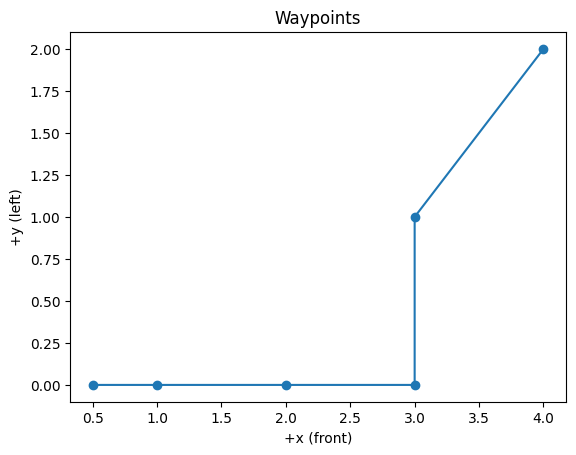

In [3]:
# visalize the waypoints
import matplotlib.pyplot as plt 
plt.plot(*zip(*waypoints), marker='o')
plt.xlabel("+x (front)")
plt.ylabel("+y (left)")
plt.title("Waypoints")

In [4]:
from metadrive.utils.waypoint_utils import interpolate, generate_smooth_spline
original_frequency = 2.0  # Hz
new_frequency = 10.0  # Hz
total_points = int(len(waypoints) * new_frequency / original_frequency)

Text(0.5, 1.0, 'Interpolated Waypoints (10Hz) 30 points')

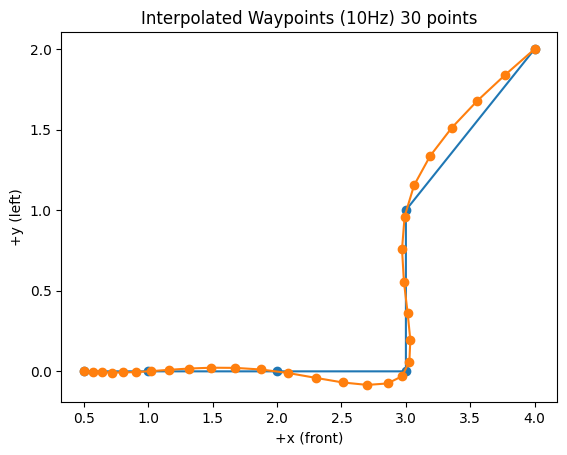

In [5]:
interpolated_x, interpolated_y = generate_smooth_spline(waypoints, total_points)
# visalize the waypoints
plt.plot(*zip(*waypoints), marker='o', label='Original Waypoints')
plt.plot(interpolated_x, interpolated_y, marker='o')
plt.xlabel("+x (front)")
plt.ylabel("+y (left)")
plt.title(f"Interpolated Waypoints (10Hz) {len(interpolated_x)} points")

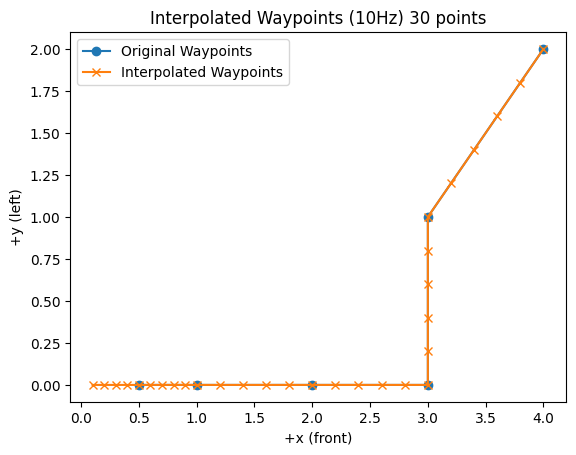

In [6]:
from metadrive.utils.waypoint_utils import interpolate
sampled = interpolate(waypoints, 2, 10)
# visalize the waypoints
plt.plot(*zip(*waypoints), marker='o', label='Original Waypoints')
plt.plot(*zip(*sampled), marker='x', label='Interpolated Waypoints')
plt.xlabel("+x (front)")    
plt.ylabel("+y (left)")
plt.title(f"Interpolated Waypoints (10Hz) {len(sampled)} points")
plt.legend()
plt.show()

In [7]:
from metadrive.utils.waypoint_utils import interpolate_headings
import numpy as np
headings = interpolate_headings(sampled)
print(headings)
print(np.pi/2, np.pi/4)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816]
1.5707963267948966 0.7853981633974483


In [8]:
from metadrive.utils.waypoint_utils import interpolate_angular_velocities
angular_velocities = interpolate_angular_velocities(headings, 1/new_frequency)
print(angular_velocities)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.57079633e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.85398163e+00
  1.11022302e-14 -5.55111512e-15  5.55111512e-15 -1.11022302e-14
  0.00000000e+00  0.00000000e+00]


In [9]:
from metadrive.utils.waypoint_utils import interpolate_velocities
velocities = interpolate_velocities(waypoints, 1/original_frequency)
print(velocities)

[[1. 0.]
 [2. 0.]
 [2. 0.]
 [0. 2.]
 [2. 2.]
 [2. 2.]]
